In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
columns_met = ["ev", "x0", "y0", "z0", "xf", "yf", "zf"]
columns_data = ["ev", "x", "y", "z", "t"]

In [14]:
# Read the file
df_met = pd.read_csv("metadata_P3.txt", sep=" ", names=columns_met, skipinitialspace=True,skiprows=1)

# Display the dataframe
print(df_met.head())

   ev        x0        y0    z0        xf        yf        zf
0   0 -0.114412  0.128430 -0.25 -0.161294  0.089339 -0.150000
1   1 -0.064382  0.040528 -0.25 -0.153344  0.230439  0.500000
2   2 -0.094137  0.215516 -0.25 -0.102950  0.186418 -0.149993
3   3  0.001376  0.137429 -0.25  0.051294  0.120500  0.359988
4   4  0.079699 -0.222917 -0.25  0.084768 -0.246694 -0.150000


In [15]:
# Read the file
df_data = pd.read_csv("example_P3.txt", sep=" ", names=columns_data, skipinitialspace=True)

# Display the dataframe
print(df_data.head())

   ev         x         y         z        t
0   1 -0.051973  0.035935 -0.224529  165.098
1   1 -0.051491  0.037636 -0.221911  170.072
2   1 -0.051924  0.037476 -0.219946  171.667
3   1 -0.055873  0.038686 -0.208889  221.628
4   1 -0.056233  0.042251 -0.206144  225.376


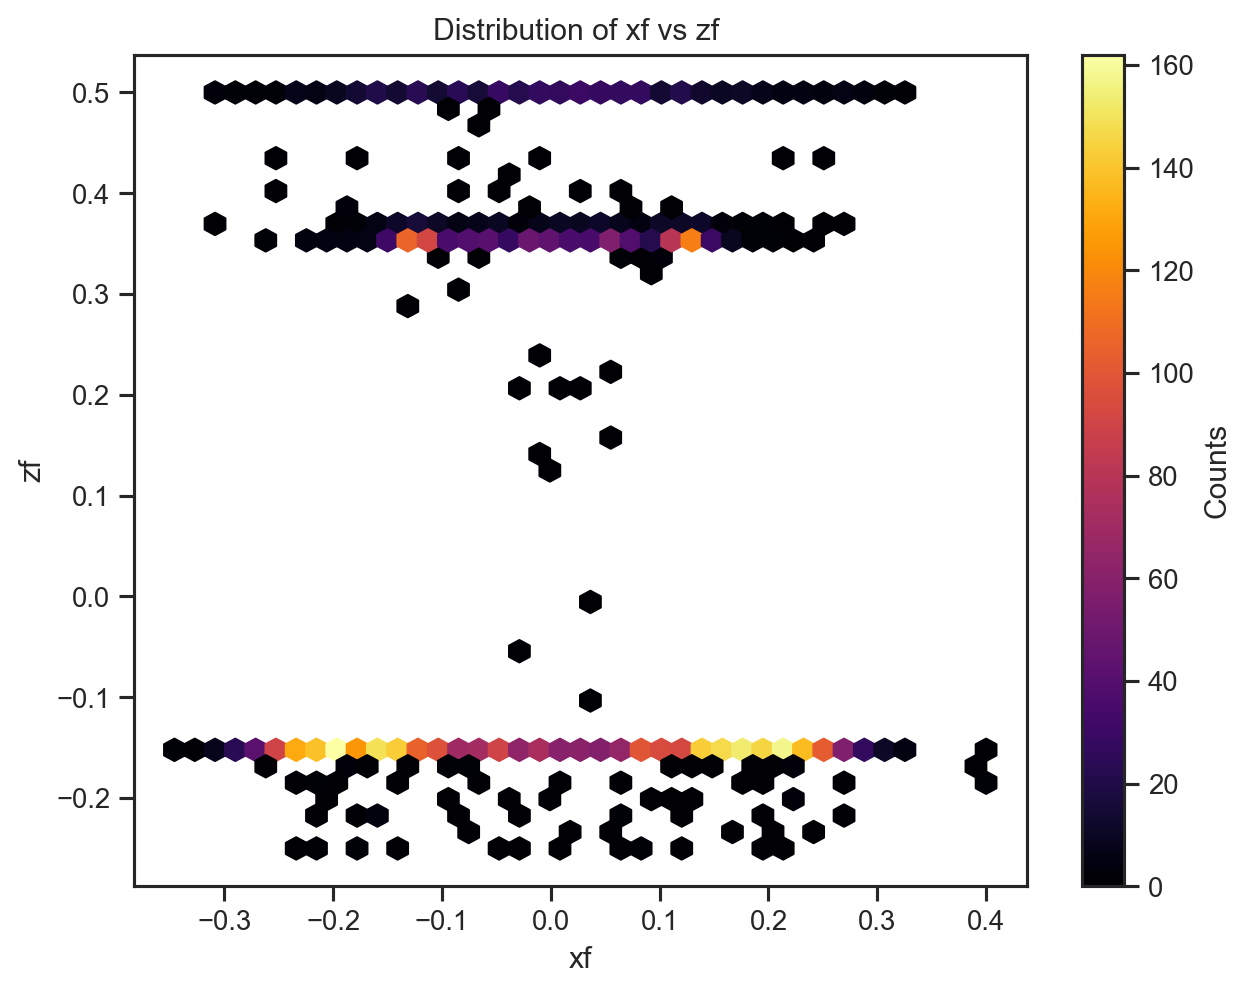

In [16]:
plt.figure(figsize=(8, 6),dpi=180)
# Create hexbin plot and get counts
hb = plt.hexbin(df_met["xf"], df_met["zf"], gridsize=40, cmap="inferno")

# Get counts from hexbin
counts = hb.get_array()

# Mask zero-count bins by setting them to NaN
counts[counts == 0] = np.nan

# Update the hexbin plot with masked values
hb.set_array(counts)

# Add colorbar and labels
plt.colorbar(label="Counts")
plt.xlabel("xf")
plt.ylabel("zf")
plt.title("Distribution of xf vs zf ")

plt.show()

In [24]:
100-len(df_met[df_met["zf"]<-0.1])/len(df_met)*100

32.88232882328823

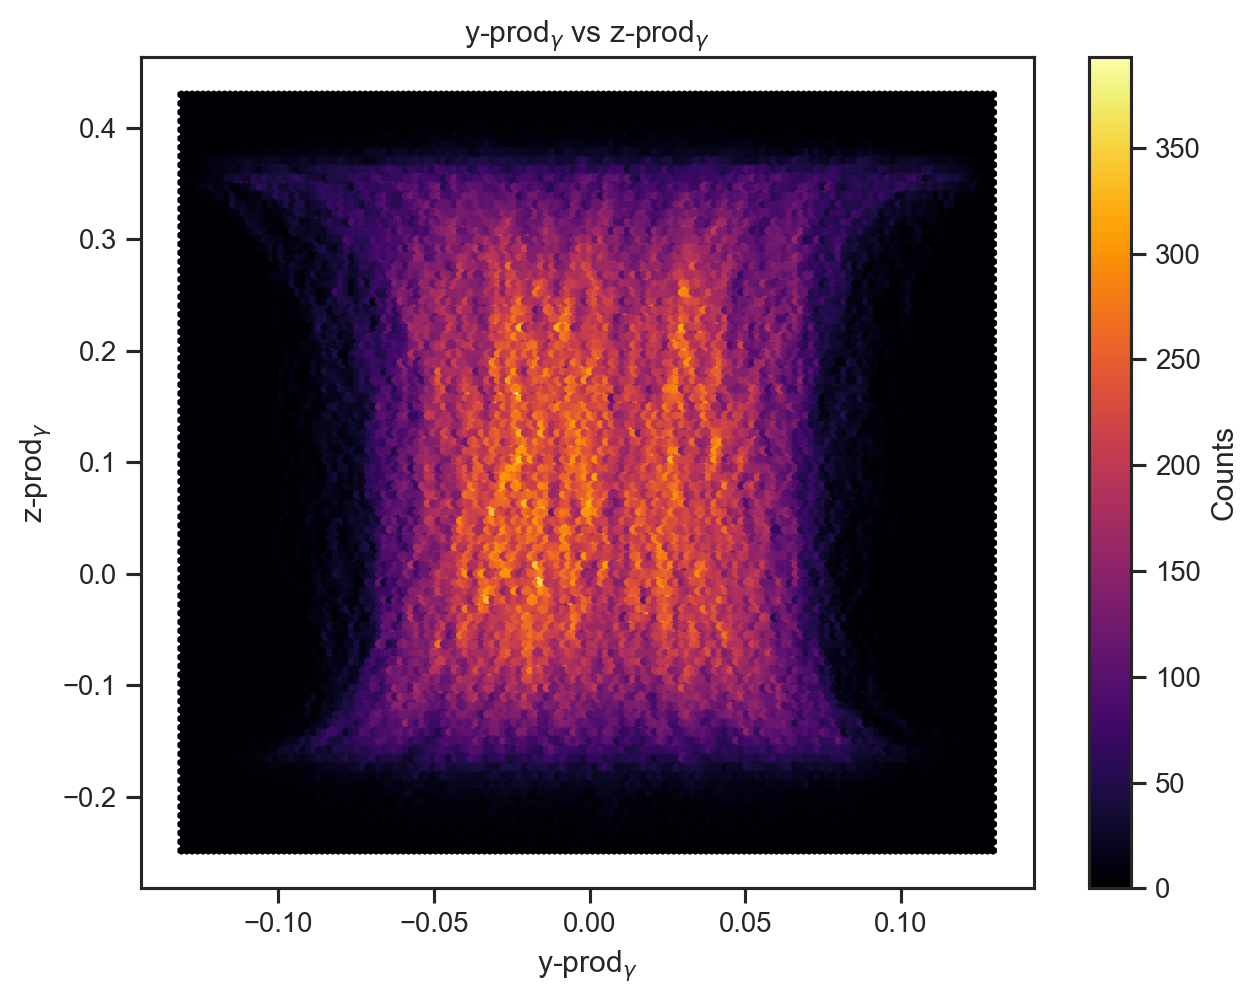

In [18]:
plt.figure(figsize=(8, 6),dpi=180)
hb = plt.hexbin(df_data["y"], df_data["z"], gridsize=150, cmap="inferno")

plt.colorbar(label="Counts")
plt.xlabel("y-prod$_{\gamma}$")
plt.ylabel("z-prod$_{\gamma}$")
plt.title("y-prod$_{\gamma}$ vs z-prod$_{\gamma}$")
plt.show()

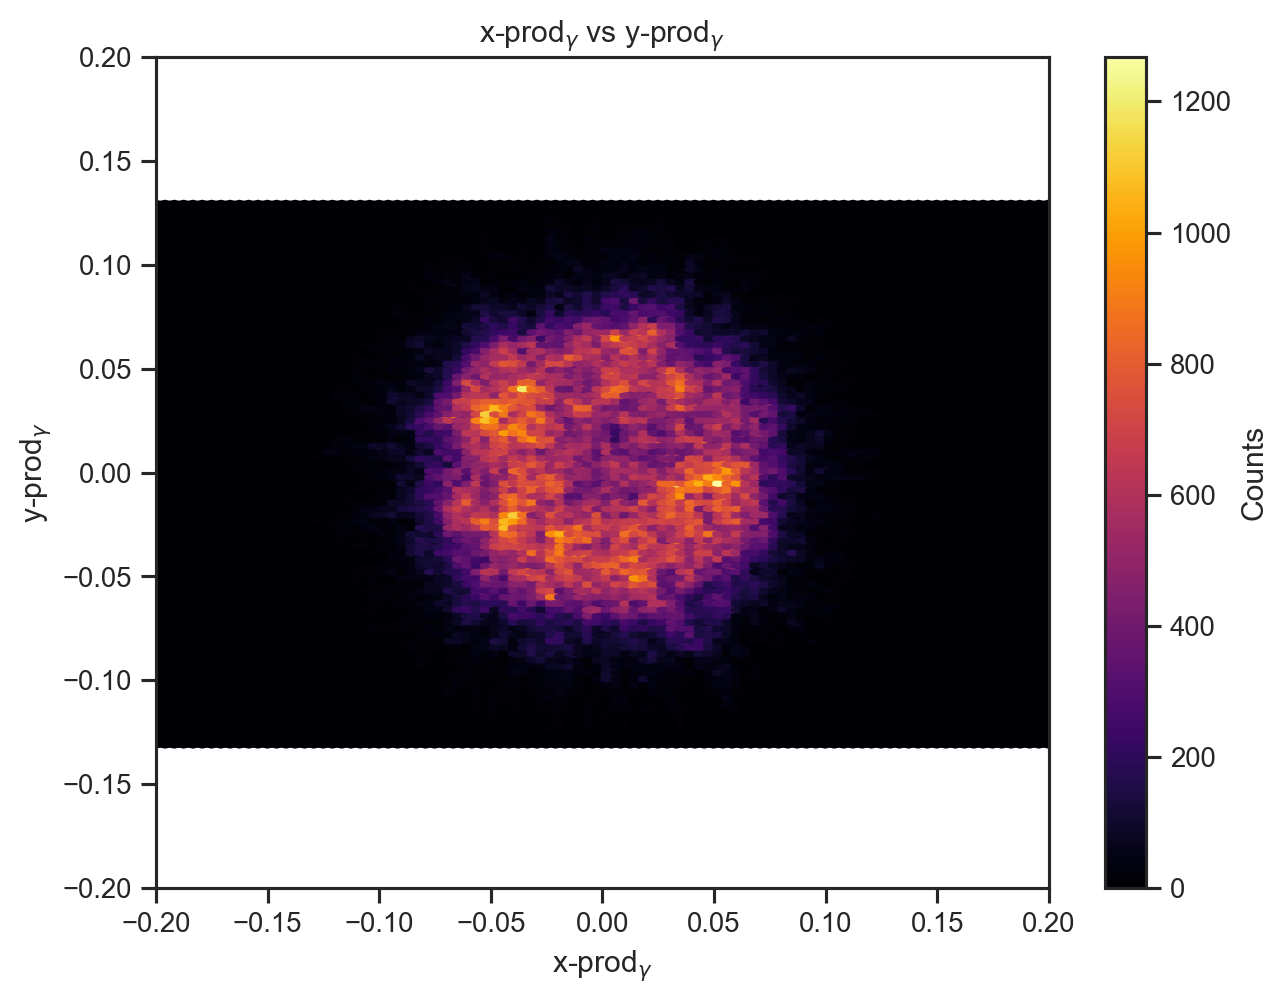

In [19]:
plt.figure(figsize=(8, 6),dpi=180)
hb = plt.hexbin(df_data["x"], df_data["y"], gridsize=150, cmap="inferno")
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])
plt.colorbar(label="Counts")
plt.xlabel("x-prod$_{\gamma}$")
plt.ylabel("y-prod$_{\gamma}$")
plt.title("x-prod$_{\gamma}$ vs y-prod$_{\gamma}$")
plt.show()

<Figure size 800x600 with 0 Axes>

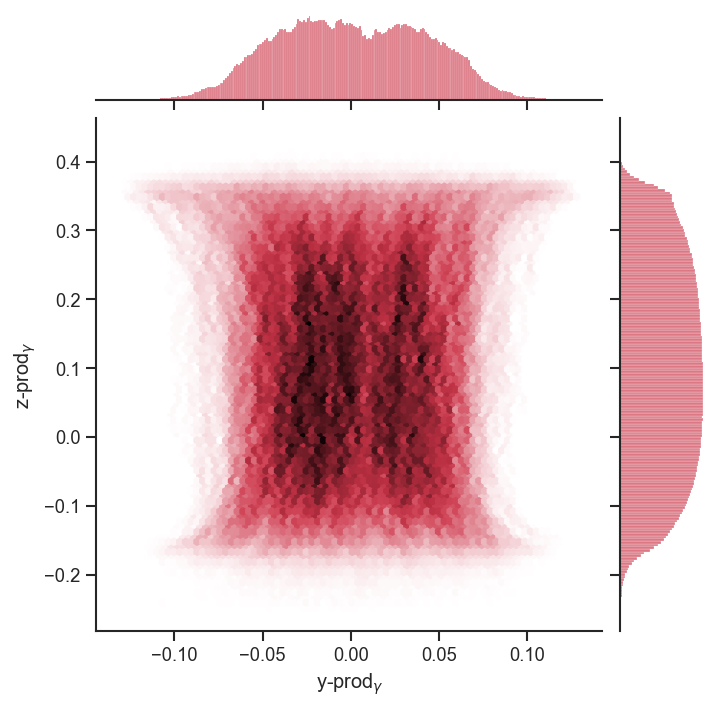

In [20]:
plt.figure(figsize=(8, 6))
# Set theme
sns.set_theme(style="ticks")

# Create hexbin joint plot
g = sns.jointplot(
    x= df_data["y"],
    y= df_data["z"], 
    kind="hex", 
    color="#D1495B",
    gridsize=80
)
g.fig.set_dpi(120)

# Modify binning for lateral histograms manually
#g.ax_marg_x.hist(df_data["y"], bins=40, color="#D1495B", alpha=0.6, range=(-0.2,0.2))
#g.ax_marg_y.hist(df_data["z"], bins=40, color="#D1495B", alpha=0.6, range=(-0.2,0.4), orientation="horizontal")


# Customize labels
g.set_axis_labels("y-prod$_{\gamma}$", "z-prod$_{\gamma}$", fontsize=12)

plt.show()

<Figure size 800x600 with 0 Axes>

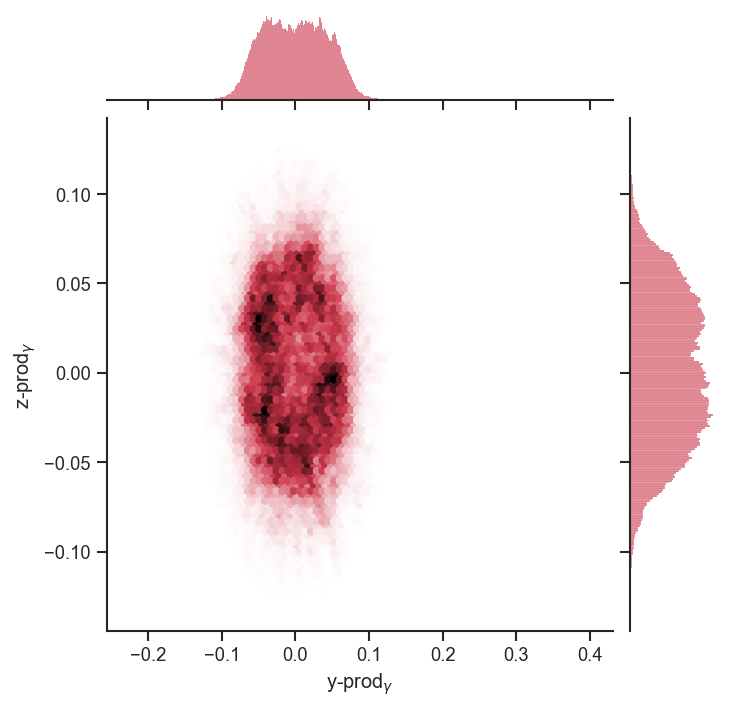

In [21]:
plt.figure(figsize=(8, 6))
# Set theme
sns.set_theme(style="ticks")

# Create hexbin joint plot
g = sns.jointplot(
    x= df_data["x"],
    y= df_data["y"], 
    kind="hex", 
    color="#D1495B",
    gridsize=80
)
g.fig.set_dpi(120)

# Customize labels
g.set_axis_labels("y-prod$_{\gamma}$", "z-prod$_{\gamma}$", fontsize=12)

plt.show()